In [142]:
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.learning_curve import learning_curve

from sklearn.datasets import make_classification
#from sklearn.cross_validation import train_test_split
#from sklearn import preprocessing
from sklearn import cross_validation, preprocessing
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score,roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [143]:
df = pd.read_csv('bank-additional-full.csv')
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [144]:
#Output value must be numerical, so I replaced categorical 'yes'/'no' with 1/0
df.replace(['yes','no', 'unknown'],[1,0, np.nan], inplace=True)
df = df.dropna()

In [145]:
def ed_preproc(ed):
    ed_new = []
    for e in ed:
        if e == 'basic.4y' or e == 'basic.6y' or e == 'basic.9y' or e == 'illiterate' or e == 'high.school':
            e = 'some'
            ed_new.append(e)
        else:
            ed_new.append(e)
    return ed_new
df.education = ed_preproc(df.education)

In [146]:
def job_proc(job):
    job_new = []
    for j in job:
        if j == 'entrepreneur':
            j = 'self-employed'
            job_new.append(j)
        elif j == 'admin.' or j == 'services' or j == 'technician':
            j = 'professional'
            job_new.append(j)
        elif j == 'housemaid':
            j = 'unemployed'
            job_new.append(j)
        else:
            job_new.append(j)
    return job_new
df.job = job_proc(df.job)

In [92]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,unemployed,married,some,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,professional,married,some,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,professional,married,some,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [147]:
#convert categorical data to numeric dummy variables
#Important note: this attribute highly affects the output target (e.g., if duration=0 
#then y='no'). Yet, the duration is not known before a call is performed. 
df = pd.get_dummies(df)
df['output'] = df.y
del df['duration']
del df['y']

In [94]:
df.head(3)


,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,output
0,56,0,0,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
2,37,0,1,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0
3,40,0,0,0,1,999,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,0,1,0,0


In [148]:
def to_df(x):
    x = pd.DataFrame(x)
    return x

In [167]:
X = df.iloc[:,:45]
X_values_scaled = preprocessing.scale(X.astype(float), copy=False)

y = df.iloc[:,45]
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state = 42)

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)


print "training set size: " + str(len(x_train_std))
print "test set size: " + str(len(x_test_std))
print "training_t set size: " + str(len(y_train))
print "test_t set size: " + str(len(y_test))

training set size: 22866
test set size: 7622
training_t set size: 22866
test_t set size: 7622


In [33]:
type(x_train)
#x_train_std.head(5)

pandas.core.frame.DataFrame

In [50]:
#find best number for KNN
def best_neighbor(N):
    best_k = 1
    best_score = 0
    for i in range(1,N+1):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_train_std, y_train)
        new_score = accuracy_score(y_test,neigh.predict(x_test_std))
        if new_score > best_score:
            best_score = new_score
            best_k = i
    
    return best_k
best_neighbor(30)

30

In [9]:
def model_search(estimator, tuned_params, scores, X_train, y_train, X_test, y_test):  
    cv = cross_validation.ShuffleSplit(len(X__scaled), n_iter=3, test_size=0.30, random_state=0)
    #kf = cross_validation.KFold(len(X_values_scaled), n_folds=10, shuffle=True)
    for score in scores:
        print"# Tuning hyper-parameters for %s" % score
        clf = GridSearchCV(estimator, tuned_params, cv=cv,scoring='%s' % score)
        clf.fit(X_train, y_train)
        print"Best parameters set found on development set:"
        print clf.best_params_
        print "Grid scores on development set:"
        for params, mean_score, scores in clf.grid_scores_:
            print "%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() * 2, params)
        print "Detailed classification report:"
        print "The model is trained on the full development set."
        print "The scores are computed on the full evaluation set."

        y_true, y_pred = y_test, clf.predict(X_test)
        print classification_report(y_true, y_pred)


In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
                    #{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['precision', 'recall']
model_search(SVC(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [126]:
tuned_parameters = [{'n_estimators': [20,40,60,80,100,120], 'max_features': ['auto','sqrt','log2'],
                     'criterion': ['gini', 'entropy']}]
scores = ['precision', 'recall']
model_search(RandomForestClassifier(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'max_features': 'log2', 'n_estimators': 80, 'criterion': 'entropy'}
Grid scores on development set:
0.515 (+/-0.023) for {'max_features': 'auto', 'n_estimators': 20, 'criterion': 'gini'}
0.530 (+/-0.013) for {'max_features': 'auto', 'n_estimators': 40, 'criterion': 'gini'}
0.524 (+/-0.017) for {'max_features': 'auto', 'n_estimators': 60, 'criterion': 'gini'}
0.530 (+/-0.013) for {'max_features': 'auto', 'n_estimators': 80, 'criterion': 'gini'}
0.538 (+/-0.006) for {'max_features': 'auto', 'n_estimators': 100, 'criterion': 'gini'}
0.532 (+/-0.021) for {'max_features': 'auto', 'n_estimators': 120, 'criterion': 'gini'}
0.524 (+/-0.025) for {'max_features': 'sqrt', 'n_estimators': 20, 'criterion': 'gini'}
0.520 (+/-0.016) for {'max_features': 'sqrt', 'n_estimators': 40, 'criterion': 'gini'}
0.523 (+/-0.018) for {'max_features': 'sqrt', 'n_estimators': 60, 'criterion': 'gini'}
0.529 (+/-0.024) for {'max_f

In [ ]:
tuned_parameters = [{'penalty': ['l1','l2'], 'C': [0.001,0.01,1.0,10,100,1000]}]
scores = ['precision', 'recall']
model_search(LogisticRegression(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [ ]:
tuned_parameters = [{'criterion': ['gini', 'entropy'],'max_depth': [3,4,5,6,7], 'max_features': ['auto','log2']}]
scores = ['precision', 'recall']
model_search(DecisionTreeClassifier(), tuned_parameters, scores, x_train_std, y_train, x_test_std, y_test)

In [152]:
kf = cross_validation.KFold(len(X_values_scaled), n_folds=10, shuffle=True)
models = [LogisticRegression(C=0.1), GaussianNB(), DecisionTreeClassifier(max_features='log2',max_depth=3,criterion='entropy'), RandomForestClassifier(n_estimators=30,criterion='entropy'), KNeighborsClassifier(30)]
scores = ["accuracy", "precision", "recall", "f1", "roc_auc"]

LogisticReg = []
GaussNB = []
DecisionTree = []
RandomForest = []
kNN = []

lists = [LogisticReg, GaussNB, DecisionTree, RandomForest, kNN]

for i, model in enumerate(models):
    for score in scores:
        pred = np.mean(cross_val_score(model, X_values_scaled, y, scoring=score, cv=kf, n_jobs=1))
        lists[i].append(pred)

scores_df = pd.DataFrame(data = [LogisticReg, GaussNB, DecisionTree, RandomForest, kNN])
scores_df.index = ["LogisticReg", "GaussNB", "DecisionTree", "RandomForest", "kNN"]
scores_df.columns = ["Accuracy", "Precision", "Recall", "F1","ROC_AUC"]
    
print scores_df



              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.664230  0.244412  0.357129  0.799544
GaussNB       0.683252   0.251840  0.762271  0.378514  0.774357
DecisionTree  0.880183   0.587444  0.146097  0.247547  0.698541
RandomForest  0.875033   0.502427  0.302165  0.383748  0.771118
kNN           0.886283   0.642828  0.228810  0.336927  0.776899


Hey you, what are you learning in there? Let't plot a learning curve to see how our model is performing and how many observations are needed for optimal performance.
More on learning curves

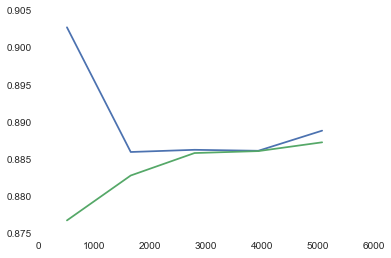

In [183]:
m, train_err, test_err = learning_curve(lr_model, x_test_std, y_test)
train_cv_err = np.mean(train_err,axis=1)
test_cv_err = np.mean(test_err,axis=1)
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)

In [31]:
#Feature search: eliminate unimportant features

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
X_new = clf.fit(x_train_std, y_train).transform(x_train_std)
#clf.feature_importances_  
# X_new.shape  


array([  1.08005360e-01,   2.71436035e-07,   4.10539092e-02,
         2.55037662e-02,   8.25326635e-02,   2.42040542e-02,
         1.39538946e-02,   1.38793637e-02,   2.18250232e-02,
         2.47403812e-02,   1.19544540e-01,   6.24616393e-02,
         1.50570440e-02,   9.74057174e-03,   2.56935446e-02,
         1.19037971e-02,   1.14830248e-02,   4.86565719e-03,
         8.83299623e-03,   1.33430895e-02,   1.99058928e-02,
         1.71605776e-02,   1.50152626e-02,   2.24166868e-02,
         1.68052131e-02,   1.16345858e-02,   8.72321892e-03,
         4.53934919e-03,   7.34122530e-03,   1.53226187e-03,
         7.63494301e-03,   1.10513458e-02,   1.44029803e-02,
         7.21075869e-03,   7.97850247e-03,   1.21721651e-02,
         5.11624387e-03,   1.94468193e-02,   2.44856526e-02,
         1.94440461e-02,   2.13707712e-02,   1.85521227e-02,
         9.48927309e-03,   1.44622020e-02,   4.34833079e-02])

In [113]:
print modelLR.coef_

[[  1.25416396e-03  -4.71654866e-02  -1.32957426e-02  -9.12429650e-03
   -1.16157709e-01  -2.02888328e-01  -5.43330944e-02  -2.33809768e+00
    1.21946282e+00   1.42164890e-01   2.79898290e-01   5.27886263e-01
   -3.98082820e-02  -1.07905583e-02   6.33216032e-03   4.76906364e-02
   -3.18389240e-04   4.93166528e-02  -4.66639481e-03  -1.51533453e-02
   -1.16837970e-03   1.17224604e-02  -8.36123558e-03  -3.47227623e-02
    4.27538670e-02   1.65552389e-01  -1.65552389e-01   5.01311077e-02
    2.07921331e-01   3.03321176e-02   5.72677971e-02  -1.69668660e-01
    1.97357156e-01  -1.31613310e-01  -9.54825803e-02   3.77087066e-02
    4.61676535e-02  -2.95871987e-02  -8.54032913e-02   2.77342504e-02
    1.94592918e-02   6.80280192e-02  -9.63435693e-02   3.06413400e-02
    1.01508877e-01]]


In [109]:
modelLR = LogisticRegression()
modelLR.fit(x_train_std, y_train)
y_predicted = modelLR.predict(x_test_std)
modelLR.coef_
test_features = modelLR.transform(x_train,threshold='mean')
print test_features[:5] 

[[ 0.21188711  0.72747746  0.8040951   0.78666491  0.401648   -1.42658398
   1.42658398 -0.42546303 -0.36671436 -0.12674168]
 [ 0.21188711 -1.07334749 -0.76586663 -1.15627695 -0.82112839  0.7009752
  -0.7009752  -0.42546303 -0.36671436 -0.12674168]
 [ 0.21188711 -1.07334749 -1.07678397 -1.20016617 -0.82112839  0.7009752
  -0.7009752  -0.42546303 -0.36671436 -0.12674168]
 [ 0.21188711  0.91376969  1.60872185  0.84349582  0.89528243 -1.42658398
   1.42658398 -0.42546303  2.72691802 -0.12674168]
 [ 0.21188711 -1.07334749 -0.76586663 -1.15346354 -0.82112839  0.7009752
  -0.7009752  -0.42546303 -0.36671436 -0.12674168]]


In [112]:
x_train[:5]

array([[ 0.48096537, -0.00992013, -1.08759349, -0.43055897, -0.55933525,
         0.21188711, -0.3716159 ,  0.72747746,  0.8040951 ,  0.87745109,
         0.78666491,  0.401648  , -0.47823713, -0.28638654,  0.88677582,
        -0.20381709, -0.27757536, -0.14288583, -0.22167479, -0.36319438,
         0.86195604, -0.66985458, -0.40636394,  0.96702208, -0.72015916,
        -1.42658398,  1.42658398, -0.27302509, -0.42546303, -0.07194597,
        -0.44719599, -0.36671436, -0.12674168,  1.46028629, -0.35988867,
        -0.14666431, -0.12846731, -0.48128924, -0.50928023, -0.51519879,
        -0.4926807 ,  1.99440032, -0.35785071,  0.4243334 , -0.20162497],
       [-0.2932262 , -0.00992013, -1.08759349, -0.43055897, -0.55933525,
         0.21188711, -0.3716159 , -1.07334749, -0.76586663, -1.35675611,
        -1.15627695, -0.82112839, -0.47823713, -0.28638654, -1.12768072,
        -0.20381709,  3.60262526, -0.14288583, -0.22167479, -0.36319438,
         0.86195604, -0.66985458, -0.40636394,  0.

In [115]:
df.dtypes

age                                int64
default                          float64
housing                          float64
loan                             float64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                  float64
job_management                   float64
job_professional                 float64
job_retired                      float64
job_self-employed                float64
job_student                      float64
job_unemployed                   float64
marital_divorced                 float64
marital_married                  float64
marital_single                   float64
education_professional.course    float64
education_some                   float64
education_univer

In [ ]:
models = {'logistic': LogisticRegression(),
          'rf': RandomForestClassifier(n_estimators=),
          'knn': KNeighborsClassifier(n_neighbors=30),
          'svc': SVC(probability=True),
          'tree': DecisionTreeClassifier(),
          #'gbm1': GradientBoostingClassifier(learning_rate=0.4,  n_estimators=200, subsample=1.0, random_state=1, verbose=1),
          #'gbm2': GradientBoostingClassifier(learning_rate=0.04, n_estimators=200, subsample=0.9, random_state=1, verbose=1),
         }
stage_preds = {}
final_preds = {}

In [ ]:
# for mname, m in models.iteritems():
#     print "*** %s" % mname
#     m.fit(train_std, train_t)
 
    
#     if hasattr(m, "staged_predict_proba"):
#         stage_preds[mname] = {'train': list(m.staged_predict_proba(train_std)),  'test': list(m.staged_predict_proba(test_std))}
#     #if hasattr(m, "predict_proba"):
#     final_preds[mname] = {'train': m.predict_proba(train),  'test': m.predict_proba(test)}

In [ ]:

              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.676784  0.227277  0.341495  0.792784
GaussNB       0.777256   0.314121  0.642662  0.421760  0.774975
DecisionTree  0.880215   0.543059  0.134073  0.283436  0.723300
RandomForest  0.875131   0.509849  0.306063  0.381843  0.767653
kNN           0.885004   0.632839  0.219367  0.325065  0.786252

              Accuracy  Precision    Recall        F1   ROC_AUC
LogisticReg   0.888743   0.664230  0.244412  0.357129  0.799544
GaussNB       0.683252   0.251840  0.762271  0.378514  0.774357
DecisionTree  0.880183   0.587444  0.146097  0.247547  0.698541
RandomForest  0.875033   0.502427  0.302165  0.383748  0.771118
kNN           0.886283   0.642828  0.228810  0.336927  0.776899